# Simple Linear Regression: Confidence- and Prediction-Intervals

This notebook demonstrates how to create confidence and prediction intervals for a linear regression model using Python, based on rental price data (Y) and living area (X).

See also: https://lmc2179.github.io/posts/confidence_prediction.html

## Libraries and Settings

In [52]:
# Import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


## Generate Apartment Data
We will use the provided data representing rental prices (`Y`) and living area (`X`).

In [53]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate values for rental_price and living_area
x = np.linspace(45, 160, 25)
y = np.interp(x, [45, 160], [1500, 4900]) + np.random.normal(0, 400, 25)

# Create a new DataFrame with 25 data points
data = pd.DataFrame({
    'rental_price': y,
    'living_area': x
})

df = pd.DataFrame(data)
df.columns = ['rental_price', 'living_area']
df.head()

,rental_price,living_area
0,1698.685661,45.000000
1,1586.360946,49.791667
2,2042.408749,54.583333
3,2534.211943,59.375000
4,1973.005317,64.166667


### Erklärung des Codes

1. **Set the random seed for reproducibility**:
   ```python
   np.random.seed(42)
   ```
   Dies stellt sicher, dass die Zufallszahlen, die im weiteren Verlauf des Codes generiert werden, bei jedem Ausführen des Codes gleich sind. Dies ist wichtig für die Reproduzierbarkeit der Ergebnisse.

2. **Generate values for rental_price and living_area**:
   ```python
   x = np.linspace(45, 160, 25)
   y = np.interp(x, [45, 160], [1500, 4900]) + np.random.normal(0, 400, 25)
   ```
   - [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") ist ein Array von 25 gleichmäßig verteilten Werten zwischen 45 und 160, das die Wohnfläche ([`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A39%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")) darstellt.
   - [`y`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") ist ein Array von 25 Werten, das die Mietpreise ([`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A22%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")) darstellt. Diese Werte werden durch lineare Interpolation zwischen 1500 und 4900 basierend auf den [`x`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")-Werten erzeugt und dann mit einer Normalverteilung ([`np.random.normal`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")) mit einem Mittelwert von 0 und einer Standardabweichung von 400 verrauscht.

3. **Create a new DataFrame with 25 data points**:
   ```python
   data = pd.DataFrame({
       'rental_price': y,
       'living_area': x
   })
   ```
   Ein DataFrame [`data`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") wird erstellt, der die generierten [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A22%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")- und [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A39%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition")-Werte enthält.

4. **Create a DataFrame and set column names**:
   ```python
   df = pd.DataFrame(data)
   df.columns = ['rental_price', 'living_area']
   df.head()
   ```
   Ein DataFrame [`df`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A13%2C%22character%22%3A0%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") wird erstellt und die Spaltennamen werden auf [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A22%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") und [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W4sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A39%7D%7D%5D%2C%2247328736-b5b0-4a13-bd3c-0705f6556a65%22%5D "Go to definition") gesetzt. Die ersten fünf Zeilen des DataFrames werden angezeigt.

### Weitere Beispiele

#### Beispiel 1: Generierung von Daten für `age` und `salary`


In [54]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate values for age and salary
age = np.linspace(20, 60, 25)
salary = np.interp(age, [20, 60], [30000, 120000]) + np.random.normal(0, 10000, 25)

# Create a new DataFrame with 25 data points
data = pd.DataFrame({
    'age': age,
    'salary': salary
})

df = pd.DataFrame(data)
df.columns = ['age', 'salary']
df.head()

,age,salary
0,20.000000,34967.141530
1,21.666667,32367.356988
2,23.333333,43976.885381
3,25.000000,56480.298564
4,26.666667,42658.466253




#### Beispiel 2: Generierung von Daten für `temperature` und `ice_cream_sales`


In [55]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate values for temperature and ice_cream_sales
temperature = np.linspace(10, 35, 25)
ice_cream_sales = np.interp(temperature, [10, 35], [100, 1000]) + np.random.normal(0, 50, 25)

# Create a new DataFrame with 25 data points
data = pd.DataFrame({
    'temperature': temperature,
    'ice_cream_sales': ice_cream_sales
})

df = pd.DataFrame(data)
df.columns = ['temperature', 'ice_cream_sales']
df.head()

,temperature,ice_cream_sales
0,10.000000,124.835708
1,11.041667,130.586785
2,12.083333,207.384427
3,13.125000,288.651493
4,14.166667,238.292331




#### Beispiel 3: Generierung von Daten für `study_hours` und `exam_score`


In [56]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate values for study_hours and exam_score
study_hours = np.linspace(0, 10, 25)
exam_score = np.interp(study_hours, [0, 10], [50, 100]) + np.random.normal(0, 5, 25)

# Create a new DataFrame with 25 data points
data = pd.DataFrame({
    'study_hours': study_hours,
    'exam_score': exam_score
})

df = pd.DataFrame(data)
df.columns = ['study_hours', 'exam_score']
df.head()

,study_hours,exam_score
0,0.000000,52.483571
1,0.416667,51.392012
2,0.833333,57.405109
3,1.250000,63.865149
4,1.666667,57.162566


Um die Daten in einem DataFrame nach einer bestimmten Spalte zu sortieren, kannst du die Methode `sort_values` von Pandas verwenden. Hier ist ein Beispiel, wie du den DataFrame [`df`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X26sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A13%2C%22character%22%3A0%7D%7D%5D%2C%2258cfb8aa-e83f-4517-b801-951a8c214664%22%5D "Go to definition") nach der Spalte [`exam_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X26sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%2258cfb8aa-e83f-4517-b801-951a8c214664%22%5D "Go to definition") sortieren kannst:



In [57]:
# Sortiere den DataFrame nach der Spalte 'exam_score'
df_sorted = df.sort_values(by='exam_score')

# Zeige die ersten fünf Zeilen des sortierten DataFrames an
df_sorted.head()

,study_hours,exam_score
1,0.416667,51.392012
0,0.000000,52.483571
4,1.666667,57.162566
2,0.833333,57.405109
5,2.083333,59.245982




Falls du die Daten in absteigender Reihenfolge sortieren möchtest, kannst du das Argument `ascending=False` hinzufügen:



In [58]:
# Sortiere den DataFrame nach der Spalte 'exam_score' in absteigender Reihenfolge
df_sorted_desc = df.sort_values(by='exam_score', ascending=False)

# Zeige die ersten fünf Zeilen des sortierten DataFrames an
df_sorted_desc.head()

,study_hours,exam_score
20,8.333333,98.994911
24,10.000000,97.278086
22,9.166667,96.170974
21,8.750000,92.621118
23,9.583333,90.792926


Um die eindeutigen Werte in einer bestimmten Spalte eines DataFrame anzuzeigen, kannst du die Methode `unique` von Pandas verwenden. Hier ist ein Beispiel, wie du die eindeutigen Werte in der Spalte [`exam_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X33sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A42%7D%7D%5D%2C%224923dd27-dd18-4692-b8c5-113ec35db4d4%22%5D "Go to definition") eines DataFrame [`df`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X26sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A0%7D%7D%5D%2C%2258cfb8aa-e83f-4517-b801-951a8c214664%22%5D "Go to definition")) anzeigen kannst:



In [59]:
# Zeige die eindeutigen Werte in der Spalte 'exam_score' an
unique_exam_scores = df['exam_score'].unique()
print(unique_exam_scores)

[52.48357077 51.39201183 57.40510936 63.86514928 57.16256646 59.24598188
 70.39606408 68.42050698 64.31929474 71.46280022 68.51624487 70.5880179
 76.20981136 67.51693211 70.5420775  78.43856235 78.26917773 86.98790333
 82.95987962 82.52181483 98.99491051 92.6211185  96.17097436 90.79292574
 97.27808638]




Falls du die eindeutigen Werte in einer anderen Spalte anzeigen möchtest, ersetze einfach `'exam_score'` durch den Namen der gewünschten Spalte.

## Fit an OLS Regression Model
We will use `statsmodels` to fit an ordinary least squares (OLS) regression model for rental price as a function of living area.

In [60]:
# Fit OLS regression
model = smf.ols('rental_price ~ living_area', data=df)

# Get and show results
results = model.fit()
print(results.summary())

# Plot data and regression line
plt.scatter(df['living_area'], df['rental_price'])
plt.plot(df['living_area'], 
         results.predict(df['living_area']), 
         color='darkred', 
         linewidth=2)
plt.xlabel('Living Area')
plt.ylabel('Rental Price')
plt.title('Living Area vs Rental Price')

# Add annotation (regression equation with f-string)
plt.text(50, 4500, f"y = {results.params[0]:.2f} + {results.params[1]:.2f}x", 
         fontsize=12, color='black')

plt.show()


PatsyError: Error evaluating factor: NameError: name 'living_area' is not defined
    rental_price ~ living_area
                   ^^^^^^^^^^^

### Erklärung des Codes

1. **Fit OLS regression**:
   ```python
   model = smf.ols('rental_price ~ living_area', data=df)
   ```
   Dies erstellt ein OLS (Ordinary Least Squares) Regressionsmodell, das die Beziehung zwischen der abhängigen Variable [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A17%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition") und der unabhängigen Variable [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A32%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition") untersucht.

2. **Get and show results**:
   ```python
   results = model.fit()
   print(results.summary())
   ```
   Das Modell wird angepasst (fit) und die Ergebnisse werden angezeigt. Die [`summary()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A14%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition")-Methode gibt eine detaillierte Zusammenfassung der Regressionsanalyse aus, einschließlich Koeffizienten, R-Quadrat-Wert und p-Werten.

3. **Plot data and regression line**:
   ```python
   plt.scatter(df['living_area'], df['rental_price'])
   plt.plot(df['living_area'], 
            results.predict(df['living_area']), 
            color='darkred', 
            linewidth=2)
   plt.xlabel('Living Area')
   plt.ylabel('Rental Price')
   plt.title('Living Area vs Rental Price')
   ```
   - Ein Streudiagramm der Daten wird erstellt, wobei [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A32%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition") auf der x-Achse und [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A17%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition") auf der y-Achse dargestellt wird.
   - Die Regressionslinie wird über die Daten geplottet. Die [`predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W6sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A17%7D%7D%5D%2C%22e66c3583-8b84-4eea-953f-2fe274a996c3%22%5D "Go to definition")-Methode wird verwendet, um die vorhergesagten Werte basierend auf dem Modell zu berechnen.

4. **Add annotation (regression equation with f-string)**:
   ```python
   plt.text(50, 4500, f"y = {results.params[0]:.2f} + {results.params[1]:.2f}x", 
            fontsize=12, color='black')
   ```
   Eine Annotation wird zum Plot hinzugefügt, die die Regressionsgleichung anzeigt. Die Koeffizienten des Modells werden mit Hilfe von f-Strings formatiert.

5. **Show plot**:
   ```python
   plt.show()
   ```
   Der Plot wird angezeigt.

### Weitere Beispiele

#### Beispiel 1: Alter und Gehalt


In [22]:
print(df.columns)

Index(['study_hours', 'exam_score'], dtype='object')




#### Beispiel 3: Studienstunden und Prüfungsergebnisse


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     216.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           3.47e-13
Time:                        19:20:11   Log-Likelihood:                -71.773
No. Observations:                  25   AIC:                             147.5
Df Residuals:                      23   BIC:                             150.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      52.3893      1.729     30.297      

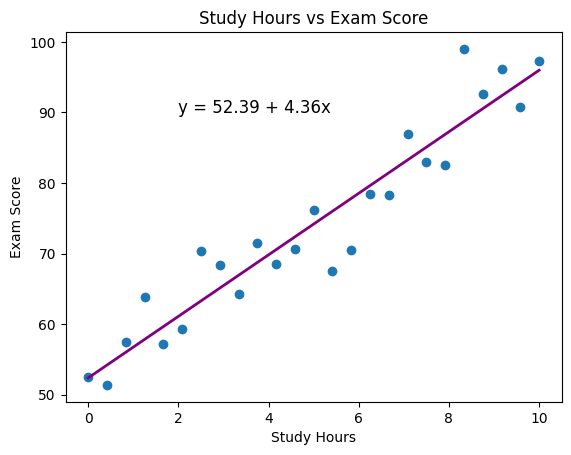

In [30]:
# Fit OLS regression
model = smf.ols('exam_score ~ study_hours', data=df)

# Get and show results
results = model.fit()
print(results.summary())

# Plot data and regression line
plt.scatter(df['study_hours'], df['exam_score'])
plt.plot(df['study_hours'], 
         results.predict(df['study_hours']), 
         color='purple', 
         linewidth=2)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')

# Add annotation (regression equation with f-string)
plt.text(2, 90, f"y = {results.params[0]:.2f} + {results.params[1]:.2f}x", 
         fontsize=12, color='black')

plt.show()

## Generate Prediction- and Confidence Intervals

We calculate the prediction- and confidence intervals for the model.

In [4]:
# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
predictions.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1691.145599,138.337095,1404.973515,1977.317683,900.530640,2481.760559
1,1811.433197,129.967171,1542.575619,2080.290776,1026.919367,2595.947028
2,1931.720795,121.823875,1679.708909,2183.732682,1152.819298,2710.622293
3,2052.008394,113.955800,1816.272860,2287.743927,1278.219796,2825.796992
4,2172.295992,106.424008,1952.141158,2392.450825,1403.110901,2941.481082


### Erklärung des Codes

1. **Setze den Signifikanzlevel**:
   ```python
   alpha = 0.05
   ```
   Dies legt den Signifikanzlevel für die Konfidenzintervalle fest. Ein [`alpha`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A0%7D%7D%5D%2C%22f1c4e634-1257-4615-8b31-4b2f72e7bb52%22%5D "Go to definition") von 0.05 bedeutet, dass die Konfidenzintervalle mit einer Wahrscheinlichkeit von 95% korrekt sind.

2. **Generiere Vorhersagen und Konfidenzintervalle**:
   ```python
   predictions = results.get_prediction(df).summary_frame(alpha)
   ```
   - [`results.get_prediction(df)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A14%7D%7D%5D%2C%22f1c4e634-1257-4615-8b31-4b2f72e7bb52%22%5D "Go to definition") erzeugt Vorhersagen basierend auf dem angepassten Modell und den Daten im DataFrame [`df`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A37%7D%7D%5D%2C%22f1c4e634-1257-4615-8b31-4b2f72e7bb52%22%5D "Go to definition").
   - [`summary_frame(alpha)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A41%7D%7D%5D%2C%22f1c4e634-1257-4615-8b31-4b2f72e7bb52%22%5D "Go to definition") erstellt ein DataFrame, das die Vorhersagen sowie die Konfidenzintervalle enthält.

3. **Zeige die ersten fünf Zeilen der Vorhersagen an**:
   ```python
   predictions.head()
   ```
   Dies zeigt die ersten fünf Zeilen des DataFrames [`predictions`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A0%7D%7D%5D%2C%22f1c4e634-1257-4615-8b31-4b2f72e7bb52%22%5D "Go to definition"), der die Vorhersagen und Konfidenzintervalle enthält.

### Weitere Beispiele, passend zum CSV-File

#### Beispiel 1: Vorhersagen und Konfidenzintervalle für Wohnfläche und Mietpreis


In [35]:
# Fit OLS regression
model = smf.ols('exam_score ~ study_hours', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  52.389320  1.729214      48.812169      55.966471     42.506633   
1  54.205415  1.624590      50.844695      57.566135     44.398992   
2  56.021510  1.522798      52.871361      59.171659     46.285241   
3  57.837605  1.424448      54.890911      60.784299     48.165247   
4  59.653700  1.330300      56.901764      62.405635     50.038886   

   obs_ci_upper  
0     62.272007  
1     64.011838  
2     65.757779  
3     67.509962  
4     69.268514  




#### Beispiel 2: Vorhersagen und Konfidenzintervalle für Entfernung zum Supermarkt und Mietpreis


In [36]:
# Fit OLS regression
model = smf.ols('exam_score ~ study_hours', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  52.389320  1.729214      48.812169      55.966471     42.506633   
1  54.205415  1.624590      50.844695      57.566135     44.398992   
2  56.021510  1.522798      52.871361      59.171659     46.285241   
3  57.837605  1.424448      54.890911      60.784299     48.165247   
4  59.653700  1.330300      56.901764      62.405635     50.038886   

   obs_ci_upper  
0     62.272007  
1     64.011838  
2     65.757779  
3     67.509962  
4     69.268514  




#### Beispiel 3: Vorhersagen und Konfidenzintervalle für Anzahl Zimmer und Mietpreis


In [37]:
# Fit OLS regression
model = smf.ols('exam_score ~ study_hours', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  52.389320  1.729214      48.812169      55.966471     42.506633   
1  54.205415  1.624590      50.844695      57.566135     44.398992   
2  56.021510  1.522798      52.871361      59.171659     46.285241   
3  57.837605  1.424448      54.890911      60.784299     48.165247   
4  59.653700  1.330300      56.901764      62.405635     50.038886   

   obs_ci_upper  
0     62.272007  
1     64.011838  
2     65.757779  
3     67.509962  
4     69.268514  




Diese Beispiele passen die OLS-Regression an verschiedene Variablen aus deinem CSV-File an und generieren Vorhersagen sowie Konfidenzintervalle für die entsprechenden Modelle.

## Visualizing the Regression Line and Confidence Interval

We now plot the observed data along with the regression line and confidence intervals.

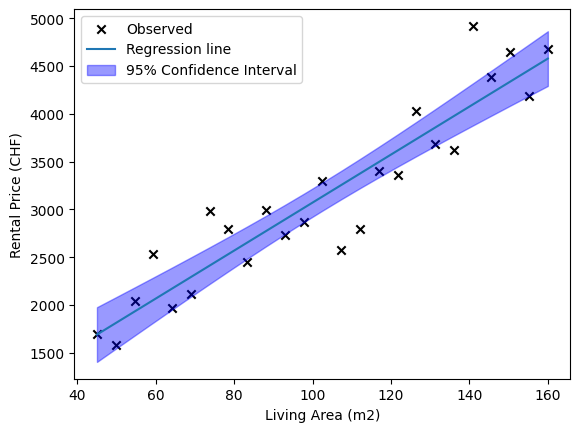

In [5]:
# Plot observed data and regression line
plt.scatter(df['living_area'], 
            df['rental_price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['living_area'], 
         predictions['mean'], 
         label='Regression line')

# Plot confidence intervals
plt.fill_between(df['living_area'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 color='blue', 
                 alpha=0.4, 
                 label='95% Confidence Interval')

# Add legend and labels
plt.xlabel('Living Area (m2)')
plt.ylabel('Rental Price (CHF)')
plt.legend()
plt.show()

### Erklärung des Codes

1. **Plot observed data and regression line**:
   ```python
   plt.scatter(df['living_area'], 
               df['rental_price'], 
               label='Observed', 
               marker='x', 
               color='black')
   ```
   - Ein Streudiagramm der beobachteten Daten wird erstellt, wobei [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A16%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition") auf der x-Achse und [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A16%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition") auf der y-Achse dargestellt wird.
   - Die Punkte werden als schwarze Kreuze ([`marker='x'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A12%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition")) dargestellt und mit dem Label "Observed" versehen.

2. **Plot regression line**:
   ```python
   plt.plot(df['living_area'], 
            predictions['mean'], 
            label='Regression line')
   ```
   - Die Regressionslinie wird über die beobachteten Daten geplottet. Die [`mean`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A22%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition")-Spalte aus dem [`predictions`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A9%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition") DataFrame enthält die vorhergesagten Werte der Regressionslinie.
   - Die Linie wird mit dem Label "Regression line" versehen.

3. **Plot confidence intervals**:
   ```python
   plt.fill_between(df['living_area'], 
                    predictions['mean_ci_lower'], 
                    predictions['mean_ci_upper'], 
                    color='blue', 
                    alpha=0.4, 
                    label='95% Confidence Interval')
   ```
   - Die Konfidenzintervalle werden als schattierte Fläche um die Regressionslinie geplottet.
   - [`mean_ci_lower`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A30%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition") und [`mean_ci_upper`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A30%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition") enthalten die unteren und oberen Grenzen der Konfidenzintervalle.
   - Die schattierte Fläche wird blau ([`color='blue'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A12%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition")) dargestellt und hat eine Transparenz von 40% ([`alpha=0.4`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A17%2C%22character%22%3A17%7D%7D%5D%2C%2203a01e08-0e64-4eef-958f-a7547f53d599%22%5D "Go to definition")).
   - Die Fläche wird mit dem Label "95% Confidence Interval" versehen.

4. **Add legend and labels**:
   ```python
   plt.xlabel('Living Area (m2)')
   plt.ylabel('Rental Price (CHF)')
   plt.legend()
   plt.show()
   ```
   - Die x-Achse wird mit "Living Area (m2)" und die y-Achse mit "Rental Price (CHF)" beschriftet.
   - Eine Legende wird hinzugefügt, um die verschiedenen Plottelemente zu beschreiben.
   - Der Plot wird angezeigt.

### Weitere Beispiele, passend zum CSV-File

#### Beispiel 1: Entfernung zum Supermarkt und Mietpreis


## Visualizing the Regression Line and Prediction Interval

We now plot the observed data along with the regression line, confidence- and prediction intervals.

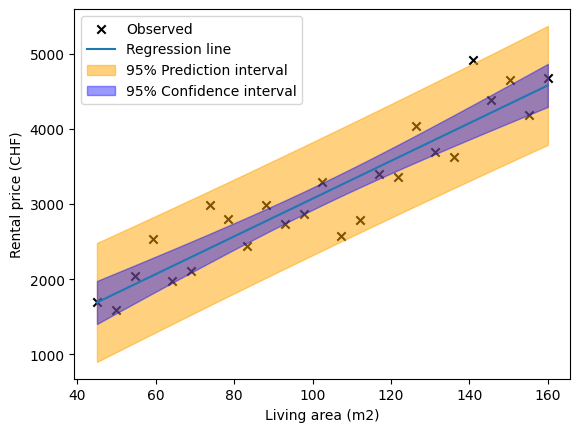

In [6]:
# Plot observed data and regression line
plt.scatter(df['living_area'], 
            df['rental_price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['living_area'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['living_area'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['living_area'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Living area (m2)')
plt.ylabel('Rental price (CHF)')
plt.legend()

# Show plot
plt.show()

### Erklärung des Codes

1. **Plot observed data and regression line**:
   ```python
   plt.scatter(df['living_area'], 
               df['rental_price'], 
               label='Observed', 
               marker='x', 
               color='black')
   ```
   - Ein Streudiagramm der beobachteten Daten wird erstellt, wobei [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A16%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") auf der x-Achse und [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A16%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") auf der y-Achse dargestellt wird.
   - Die Punkte werden als schwarze Kreuze ([`marker='x'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A12%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")) dargestellt und mit dem Label "Observed" versehen.

2. **Plot regression line**:
   ```python
   plt.plot(df['living_area'], 
            predictions['mean'], 
            label='Regression line')
   ```
   - Die Regressionslinie wird über die beobachteten Daten geplottet. Die [`mean`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A22%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")-Spalte aus dem [`predictions`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A9%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") DataFrame enthält die vorhergesagten Werte der Regressionslinie.
   - Die Linie wird mit dem Label "Regression line" versehen.

3. **Plot prediction interval**:
   ```python
   plt.fill_between(df['living_area'], 
                    predictions['obs_ci_lower'], 
                    predictions['obs_ci_upper'], 
                    alpha=.5, 
                    label='95% Prediction interval',
                    color='orange')
   ```
   - Das Vorhersageintervall wird als schattierte Fläche um die Regressionslinie geplottet.
   - [`obs_ci_lower`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A30%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") und [`obs_ci_upper`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A30%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") enthalten die unteren und oberen Grenzen des Vorhersageintervalls.
   - Die schattierte Fläche wird orange ([`color='orange'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A12%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")) dargestellt und hat eine Transparenz von 50% ([`alpha=.5`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A16%2C%22character%22%3A17%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")).
   - Die Fläche wird mit dem Label "95% Prediction interval" versehen.

4. **Plot confidence interval**:
   ```python
   plt.fill_between(df['living_area'], 
                    predictions['mean_ci_lower'], 
                    predictions['mean_ci_upper'], 
                    alpha=.4, 
                    label='95% Confidence interval',
                    color='blue')
   ```
   - Das Konfidenzintervall wird als schattierte Fläche um die Regressionslinie geplottet.
   - [`mean_ci_lower`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A22%2C%22character%22%3A30%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") und [`mean_ci_upper`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A23%2C%22character%22%3A30%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") enthalten die unteren und oberen Grenzen des Konfidenzintervalls.
   - Die schattierte Fläche wird blau ([`color='blue'`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A12%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")) dargestellt und hat eine Transparenz von 40% ([`alpha=.4`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A16%2C%22character%22%3A17%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition")).
   - Die Fläche wird mit dem Label "95% Confidence interval" versehen.

5. **Add labels**:
   ```python
   plt.xlabel('Living area (m2)')
   plt.ylabel('Rental price (CHF)')
   plt.legend()
   ```
   - Die x-Achse wird mit "Living area (m2)" und die y-Achse mit "Rental price (CHF)" beschriftet.
   - Eine Legende wird hinzugefügt, um die verschiedenen Plottelemente zu beschreiben.

6. **Show plot**:
   ```python
   plt.show()
   ```
   - Der Plot wird angezeigt.

Dieser Code visualisiert die beobachteten Daten, die Regressionslinie, das Vorhersageintervall und das Konfidenzintervall für die Beziehung zwischen [`living_area`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A16%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition") und [`rental_price`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22codespaces%2Bunhallowed-seance-v6q6444j4vq4cw4gv%22%2C%22path%22%3A%22%2Fworkspaces%2Fpython_machine_learning_basics%2FLinear_Regression%2Flinear_regression_confidence_and_prediction_intervals.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X15sdnNjb2RlLXJlbW90ZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A16%7D%7D%5D%2C%22d10dabe6-3c19-400c-ab6a-88a9b358c3e9%22%5D "Go to definition").

Um Vorhersagen und Konfidenzintervalle für eine andere Variable in deinem CSV-File zu generieren, musst du die OLS-Regression für die gewünschte Variable anpassen und dann die Vorhersagen und Konfidenzintervalle berechnen. Hier sind die Schritte, um dies zu tun:

1. **Lade die Daten**:
   ```python
   import pandas as pd
   import statsmodels.formula.api as smf
   import matplotlib.pyplot as plt

   # CSV-Datei laden
   df = pd.read_csv('path_to_your_csv_file.csv', delimiter=';')
   ```

2. **Führe die OLS-Regression durch**:
   ```python
   # Beispiel: Regression für 'price' basierend auf 'area'
   model = smf.ols('price ~ area', data=df)
   results = model.fit()
   ```

3. **Generiere Vorhersagen und Konfidenzintervalle**:
   ```python
   # Generiere Vorhersagen und Konfidenzintervalle
   alpha = 0.05
   predictions = results.get_prediction(df).summary_frame(alpha)
   print(predictions.head())
   ```

4. **Visualisiere die Ergebnisse**:
   ```python
   # Plot observed data and regression line
   plt.scatter(df['area'], 
               df['price'], 
               label='Observed', 
               marker='x', 
               color='black')

   # Plot regression line
   plt.plot(df['area'], 
            predictions['mean'], 
            label='Regression line')

   # Plot prediction interval
   plt.fill_between(df['area'], 
                    predictions['obs_ci_lower'], 
                    predictions['obs_ci_upper'], 
                    alpha=.5, 
                    label='95% Prediction interval',
                    color='orange')

   # Plot confidence interval
   plt.fill_between(df['area'], 
                    predictions['mean_ci_lower'], 
                    predictions['mean_ci_upper'], 
                    alpha=.4, 
                    label='95% Confidence interval',
                    color='blue')

   # Add labels
   plt.xlabel('Wohnfläche (m²)')
   plt.ylabel('Mietpreis (CHF)')
   plt.legend()

   # Show plot
   plt.show()
   ```

### Weitere Beispiele für andere Variablen

#### Beispiel 1: Entfernung zum Supermarkt und Mietpreis


In [47]:
# Fit OLS regression
model = smf.ols('price ~ dist_supermarket', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

# Plot observed data and regression line
plt.scatter(df['dist_supermarket'], 
            df['price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['dist_supermarket'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['dist_supermarket'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['dist_supermarket'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Entfernung zum Supermarkt (m)')
plt.ylabel('Mietpreis (CHF)')
plt.legend()

# Show plot
plt.show()

PatsyError: Error evaluating factor: NameError: name 'price' is not defined
    price ~ dist_supermarket
    ^^^^^



#### Beispiel 2: Anzahl Zimmer und Mietpreis


In [48]:
# Fit OLS regression
model = smf.ols('price ~ rooms', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

# Plot observed data and regression line
plt.scatter(df['rooms'], 
            df['price'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['rooms'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['rooms'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['rooms'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Anzahl Zimmer')
plt.ylabel('Mietpreis (CHF)')
plt.legend()

# Show plot
plt.show()

PatsyError: Error evaluating factor: NameError: name 'rooms' is not defined
    price ~ rooms
            ^^^^^



#### Beispiel 3: Wohnfläche und Preis pro Quadratmeter


In [51]:
# Fit OLS regression
model = smf.ols('price ~ rooms', data=df)
results = model.fit()

# Generate predictions and confidence intervals
alpha = 0.05
predictions = results.get_prediction(df).summary_frame(alpha)
print(predictions.head())

# Plot observed data and regression line
plt.scatter(df['area'], 
            df['price_per_m2'], 
            label='Observed', 
            marker='x', 
            color='black')

# Plot regression line
plt.plot(df['area'], 
         predictions['mean'], 
         label='Regression line')

# Plot prediction interval
plt.fill_between(df['area'], 
                 predictions['obs_ci_lower'], 
                 predictions['obs_ci_upper'], 
                 alpha=.5, 
                 label='95% Prediction interval',
                 color='orange')

# Plot confidence interval
plt.fill_between(df['area'], 
                 predictions['mean_ci_lower'], 
                 predictions['mean_ci_upper'], 
                 alpha=.4, 
                 label='95% Confidence interval',
                 color='blue')

# Add labels
plt.xlabel('Wohnfläche (m²)')
plt.ylabel('Preis pro Quadratmeter (CHF)')
plt.legend()

# Show plot
plt.show()

PatsyError: Error evaluating factor: NameError: name 'rooms' is not defined
    price ~ rooms
            ^^^^^



Diese Beispiele zeigen, wie du die OLS-Regression für verschiedene Variablen in deinem CSV-File durchführen und die Vorhersagen sowie Konfidenzintervalle visualisieren kannst.

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-28 19:01:38
Python Version: 3.11.10
-----------------------------------
